### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [450]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [451]:
data = pd.read_csv('data/coupons.csv')

In [452]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [453]:
print(data['RestaurantLessThan20'].dtype)

object


2. Investigate the dataset for missing or problematic data.

In [454]:
# Find missing values in all columns
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [455]:
data['car'] = data['car'].fillna('Unknown')
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('Unknown')
data['CarryAway'] = data['CarryAway'].fillna('Unknown')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('Unknown')
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('Unknown')
data['Bar'] = data['Bar'].fillna('Unknown')

# check all missing values have been replaced with 'Unknown'
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# convert restaurant less than 20 column to string to generate proportion
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].astype(str)
print(data['RestaurantLessThan20'])




Missing values per column:
 destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64
0        4~8
1        4~8
2        4~8
3        4~8
4        4~8
        ... 
12679    4~8
12680    4~8
12681    4~8
12682    4~8
12683    4~8
Name: RestaurantLessThan20, Length: 12684, dtype: object


4. What proportion of the total observations chose to accept the coupon?



In [456]:
Coupon_accept = data['Y'].sum()
proportion = Coupon_accept / len(data)
print(Coupon_accept, len(data), proportion)




7210 12684 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

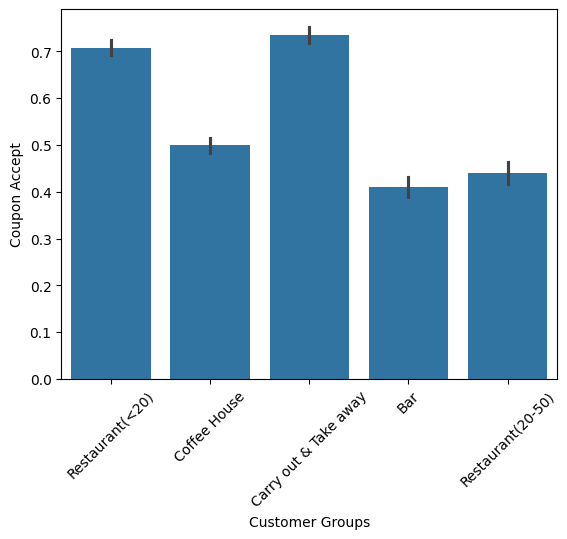

In [457]:
sns.barplot(x='coupon', y = 'Y', data=data)

plt.xlabel('Customer Groups')
plt.ylabel('Coupon Accept')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

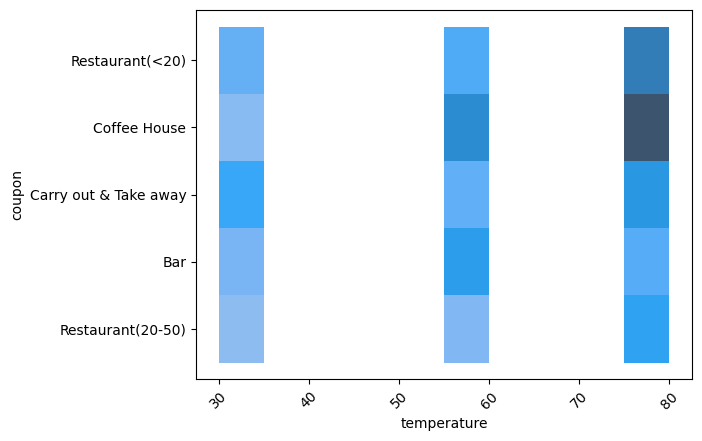

In [458]:
sns.histplot(x='temperature', y = 'coupon', bins = 10, data=data)
plt.xticks(rotation=45)
plt.show()

#sns.histplot(x='temperature', y = 'Y', bins = 10, data=data)
#plt.xticks(rotation=45)
#plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [459]:

barcoupon = data[data['coupon'] == 'Bar']
print(barcoupon)


           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never   

2. What proportion of bar coupons were accepted?


In [460]:


# Group by the 'coupon' column on Bar group customers who accepted the coupon and perform aggregation
group_barcoupon_accept = barcoupon.groupby('coupon').agg({'Y': 'sum'})

# Count all customers that received the bar coupon
Total_barcoupon = barcoupon.groupby('coupon').agg({'Y': 'count'})

# Display the result
print(group_barcoupon_accept, Total_barcoupon)

Bar_coupon_accept_proportion = group_barcoupon_accept/ Total_barcoupon
print(Bar_coupon_accept_proportion)


          Y
coupon     
Bar     827            Y
coupon      
Bar     2017
               Y
coupon          
Bar     0.410015


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [461]:
# Filter customers who went to bar 3 or fewer times a month 
bar_3_eq_less = barcoupon[barcoupon['Bar'].isin(['1~3' , 'less1'])]

#Calculate Acceptance rate of customers who went to bar 3 or fewer times a month 
acceptance_rt_3_eq_less = bar_3_eq_less['Y'].mean() * 100

# Filter customers who went to bar more than 3 times a month 
bar_3_more = barcoupon[barcoupon['Bar'].isin(['4~8' , 'gt8'])]

#Calculate Acceptance rate of customers who went to bar more than 3 times a month 
acceptance_rt_3_more = bar_3_more['Y'].mean() * 100

#compare acceptance rate of customers who went 3 or fewer times to bar with those who went more 
if acceptance_rt_3_eq_less >= acceptance_rt_3_more: 
    print("Customers who went to bar 3 or fewer times had a higher coupon acceptance rate of ", round(acceptance_rt_3_eq_less, 2 ) , '%')
else:
    print("Customers who went to bar more than 3 times had a higher coupon acceptance rate of ", round(acceptance_rt_3_more, 2) , '%' )
     



Customers who went to bar more than 3 times had a higher coupon acceptance rate of  76.88 %


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [462]:
# Filter customers who went to bar more than once a month and over age 25
bar_age_gt25_gt1m = barcoupon[~ barcoupon['age'].isin([ '21', 'below21']) & (barcoupon['Bar'].isin( ['1~3' , '4~8', 'gt8'])) ]

# Calculate acceptance rate of customers who went to bar more than once a month and over age 25
bar_age_gt25__gt1m_rt = bar_age_gt25_gt1m['Y'].mean() * 100

# Filter customers of all others than those who went to bar more than once a month and over age 25
bar_all_others = barcoupon[ barcoupon['age'].isin([ '21', 'below21']) | (~ barcoupon['Bar'].isin( ['1~3' , '4~8', 'gt8']))]

#Calculate acceptance rate of customers of all others than those who went to bar more than once a month and over age 25
bar_all_others_rt = bar_all_others['Y'].mean() * 100 

#Compare acceptance rate of both groups
if bar_age_gt25__gt1m_rt >= bar_all_others_rt: 
    print("Customers who went to bar more than once a month and are over age of 25 had a higher coupon acceptance rate of ", round( bar_age_gt25__gt1m_rt, 2) , '%' )
else:
    print("Customers who didn't go to bar went to bar more than once a month or are over age of 25 had a higher coupon acceptance rate of  ", round (bar_all_others_rt, 2) , '%' )
     



Customers who went to bar more than once a month and are over age of 25 had a higher coupon acceptance rate of  69.52 %


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
# Filter customers who went to bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing or forestry
bar_age_gt1m_ntkd_fff = barcoupon[(~ barcoupon['occupation'].isin(['Farming Fishing & Forestry'])) & (barcoupon['Bar'].isin( ['1~3' , '4~8', 'gt8'])) & (~ barcoupon['passanger'].isin(['Kid(s)'])) ]

# Calculate acceptance rate of customers who went to bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing or forestry
bar_age_gt1m_ntkd_fff_rt = bar_age_gt1m_ntkd_fff['Y'].mean() * 100

# Filter all other customers other than group of customers customers who went to bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing or forestry
bar_age_gt1m_all_others = barcoupon[ barcoupon['occupation'].isin(['Farming Fishing & Forestry']) | (~ barcoupon['Bar'].isin( ['1~3' , '4~8', 'gt8'])) | barcoupon['passanger'].isin(['Kid(s)']) ]

# Calculate acceptance rate of all other customers other than group of customers customers who went to bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing or forestry
bar_age_gt1m_all_others_rt = bar_age_gt1m_all_others['Y'].mean() * 100
print(bar_age_gt1m_all_others_rt)

# Compare acceptance rates of both groups
if bar_age_gt1m_ntkd_fff_rt >= bar_age_gt1m_all_others_rt:
    print("Customers who went to bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing , or forestry had a higher acceptance rate of ", round(bar_age_gt1m_ntkd_fff_rt , 2) , '%' )
else:
    print("Customers who didn't go to bar more than once a month or had passengers that were a kid or had occupations farming, fishing , or forestry had a higher acceptance rate of ", round( bar_age_gt1m_all_others_rt,2 ) , '%')


29.6043656207367
Customers who went to bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing , or forestry had a higher acceptance rate of  71.32 %


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [467]:
acceptance_rt_df = pd.DataFrame({
                                  'Group': [1,2,3],
                                   'GroupDesc' : [' Visits > 1 month and had no kid passangers and were not widowed', 'Visits > 1 month and age < 30', 'Visits to cheap restaurants > 4 month and income < 50K' ],
                                   'Acceptance_rt_grp': [0.00 , 0.00, 0.00]
                                                  })



barcoupon_grp1 = barcoupon[ (barcoupon['Bar'].isin( ['1~3' , '4~8', 'gt8'])) & (~ barcoupon['passanger'].isin(['Kid(s)'])) & (~ barcoupon['maritalStatus'].isin(['Widowed']))]
barcoupon_grp2 = barcoupon[ (barcoupon['Bar'].isin( ['1~3' , '4~8', 'gt8'])) & (  barcoupon['age'].isin([ '26', '21', 'below21'])) ]
barcoupon_grp3 = barcoupon[ (barcoupon['RestaurantLessThan20'].isin( ['4~8', 'gt8'])) & (  barcoupon['income'].isin([ 'Less than $12500',  '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])) ]

acceptance_rt_df.loc[0, 'Acceptance_rt_grp'] = round( (barcoupon_grp1['Y'].mean() * 100), 2)
acceptance_rt_df.loc[1, 'Acceptance_rt_grp'] = round( (barcoupon_grp2['Y'].mean() * 100), 2)
acceptance_rt_df.loc[2, 'Acceptance_rt_grp'] = round( (barcoupon_grp3['Y'].mean() * 100), 2)


# Sort Acceptance rates of all 3 groups
sorted_acceptance_rt = acceptance_rt_df.sort_values(by='Acceptance_rt_grp').reset_index(drop=True)
print(sorted_acceptance_rt)
# Print Highest Acceptance rate and group description
print('Customer group with ', sorted_acceptance_rt.iloc[-1]['GroupDesc'], 'have highest acceptance rate of ', sorted_acceptance_rt.iloc[-1]['Acceptance_rt_grp'] , '%')

# Print Lowest Acceptance rate and group description
print('Customer group with ', sorted_acceptance_rt.iloc[0]['GroupDesc'], 'have lowest acceptance rate of ', sorted_acceptance_rt.iloc[0]['Acceptance_rt_grp'] , '%')

   Group                                          GroupDesc  Acceptance_rt_grp
0      3  Visits to cheap restaurants > 4 month and inco...              45.35
1      1   Visits > 1 month and had no kid passangers an...              71.32
2      2                      Visits > 1 month and age < 30              72.17
Customer group with  Visits > 1 month and age < 30 have highest acceptance rate of  72.17 %
Customer group with  Visits to cheap restaurants > 4 month and income < 50K have lowest acceptance rate of  45.35 %


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?


1. Age plays an important role in accepting Bar coupons for customers who visit Bar atleast once a month. It was seen through above observations that Customers that are over age 25 will accept the Bar coupon 70% of the time.
2. Type of Passangers also plays a role in Bar coupon acceptance. If the driver has kid passengers in car , they have less Bar coupon acceptance rate of around 30% .
3. Occupation influences Bar visits. Customers with occupation like farming, fishing, forestry occupations don't accept Bar coupons that often and have less acceptance rate, around 30%. 
4. Income influences Bar coupon acceptance. Customers that have income < 50k & can visit cheap restaurants, have less than 50% chances of accepting Bar coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

                         Y
RestaurantLessThan20      
1~3                   3010
4~8                   2093
gt8                    781
less1                 1119                          Y
RestaurantLessThan20      
1~3                   5376
4~8                   3580
Unknown                130
gt8                   1285
less1                 2093
never                  220
                             Y
RestaurantLessThan20          
1~3                   0.559896
4~8                   0.584637
Unknown                    NaN
gt8                   0.607782
less1                 0.534639
never                      NaN
                             Y
RestaurantLessThan20          
1~3                   0.559896
4~8                   0.584637
gt8                   0.607782
less1                 0.534639


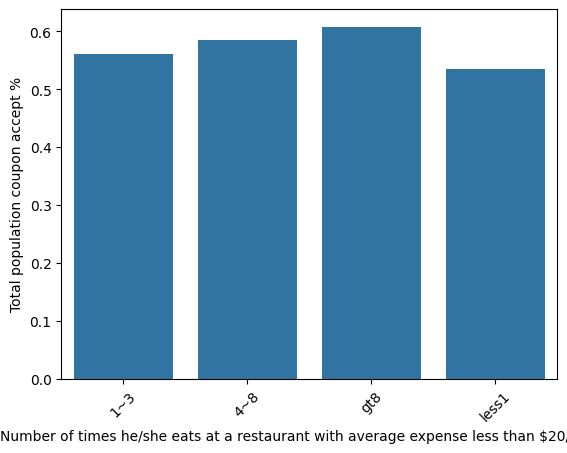

In [256]:
# Exploring Customer group that eats at Restaurants with avergae expense less than $20/ person 
# Calculate propotion of customers that accept coupon if they eat at a restaurant wiith average expense less than $20/person
Coupon_accept_data = data[data['Y'] == 1]
list_of_custgoingtorest = ['1~3' , '4~8' , 'gt8', 'less1']

#Coupon_accept_data['RestaurantLessThan20'] = Coupon_accept_data['RestaurantLessThan20'].astype(str)
Coupon_accept_data = Coupon_accept_data[Coupon_accept_data['RestaurantLessThan20'].isin(list_of_custgoingtorest)]
# Group by the 'RestaurantLessThan20' column on customers who accepted the coupon and perform aggregation
group_coupon_accept_data = Coupon_accept_data.groupby('RestaurantLessThan20').agg({'Y': 'sum'})

#Group by the 'RestaurantLessThan20' column on all customers and perform aggregation
Total_population = data.groupby('RestaurantLessThan20').agg({'Y': 'count'})

# Display the result
print(group_coupon_accept_data, Total_population)

RestaurantLessThan20_Proportion = group_coupon_accept_data/ Total_population
print(RestaurantLessThan20_Proportion)

RestaurantLessThan20_Proportion = RestaurantLessThan20_Proportion.drop( [ 'Unknown', 'never'])
print(RestaurantLessThan20_Proportion)
sns.barplot(x='RestaurantLessThan20', y = 'Y', data=RestaurantLessThan20_Proportion)
plt.xlabel('Number of times he/she eats at a restaurant with average expense less than $20/person')
plt.ylabel('Total population coupon accept %')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Further subgroup customers that eat at restaurants with expense < $20 and destination to determine impact of destination
group_coupon_accept_data_dest = Coupon_accept_data.groupby('destination').agg({'Y': 'sum'})
print(group_coupon_accept_data_dest)

                    Y
destination          
Home             1600
No Urgent Place  3852
Work             1551


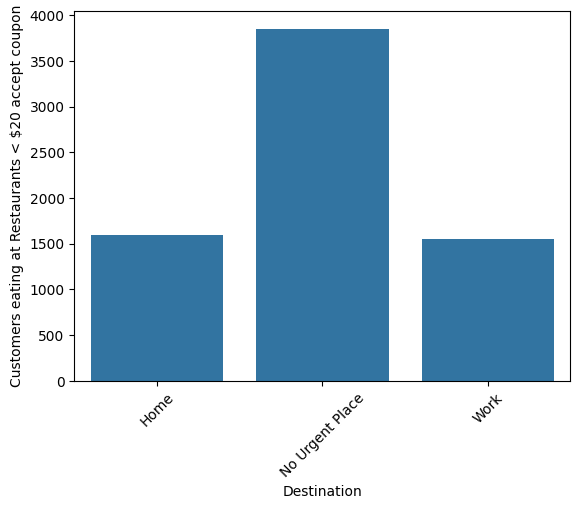

In [ ]:
# plot barplot of customers accepting coupon for restaurants with less than $20 expense and going to different destinations
rl20_dest_acceptcoupon = rl20.groupby('destination').agg({'Y': 'sum'}).reset_index()
rl20_dest_acceptcoupon
sns.barplot(x='destination', y ='Y', data= rl20_dest_acceptcoupon)
plt.xlabel('Destination')
plt.ylabel('Customers eating at Restaurants < $20 accept coupon')
plt.xticks(rotation=45)
plt.show()